In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader , dataset , random_split
import matplotlib.pyplot as plt

In [6]:
from pathlib import Path

In [7]:
# Huggingface datasets and tokenizers
from datasets import load_dataset
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace

In [9]:
config = get_config()
from  datasets import load_dataset
from config import save_weights_file_path , get_config
ds_raw =  load_dataset("Helsinki-NLP/opus_books",f"{config['srs_lang']}-{config['tgt_lang']}",split='train')

In [13]:
from train import get_or_build_tokenizer
## Develop the Tokenizers
Tokenizer_srs = get_or_build_tokenizer(config , ds_raw , config['srs_lang'])
Tokenizer_tgt = get_or_build_tokenizer(config , ds_raw , config['tgt_lang'])


In [18]:
en_sentence_lengths = []
es_sentence_lengths = []
max_len_srs = 0
max_len_tgt = 0

In [26]:
for obj in ds_raw:
        srs_len = len(Tokenizer_srs.encode(obj['translation'][config['srs_lang']]).ids)  # Get length of source sentence
        tgt_len = len(Tokenizer_tgt.encode(obj['translation'][config['tgt_lang']]).ids)  # Get length of target sentence
        en_sentence_lengths.append(srs_len)
        es_sentence_lengths.append(tgt_len)
        max_len_srs = max(max_len_srs, srs_len)
        max_len_tgt = max(max_len_tgt , tgt_len)



print(f"Max sentence length of srs lang : {max(en_sentence_lengths)}")
print(f"Min sentence length of srs lang : {min(en_sentence_lengths)}")
print(f"Max sentence length of tgt lang : {max(es_sentence_lengths)}")
print(f"Min sentence length of tgt lang : {min(es_sentence_lengths)}")
print(f"Average sentence length of srs lang: {sum(en_sentence_lengths) / len(en_sentence_lengths):.2f}")
print(f"Average sentence length of tgt lang: {sum(es_sentence_lengths) / len(es_sentence_lengths):.2f}")

Max sentence length of srs lang : 767
Min sentence length of srs lang : 1
Max sentence length of tgt lang : 782
Min sentence length of tgt lang : 1
Average sentence length of srs lang: 27.49
Average sentence length of tgt lang: 25.49


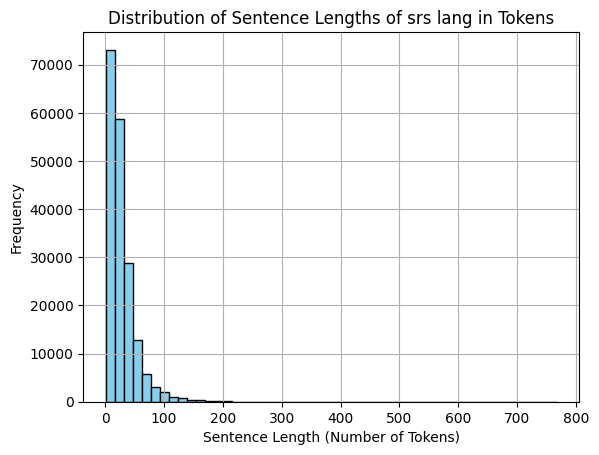

In [27]:
#  Plot the sentence length distribution od srs lang 
plt.hist(en_sentence_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Lengths of srs lang in Tokens')
plt.xlabel('Sentence Length (Number of Tokens)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

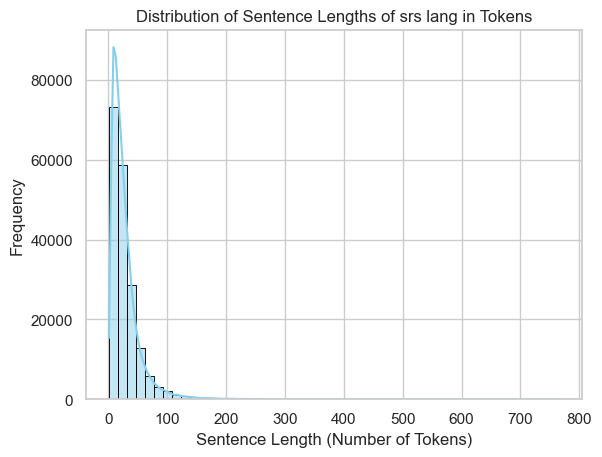

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the seaborn style is applied
sns.set(style="whitegrid")

# Plot the sentence length distribution of source language (srs lang)
sns.histplot(en_sentence_lengths, bins=50, kde=True, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Sentence Lengths of srs lang in Tokens')
plt.xlabel('Sentence Length (Number of Tokens)')
plt.ylabel('Frequency')

# Show the grid
plt.grid(True)

# Display the plot
plt.show()

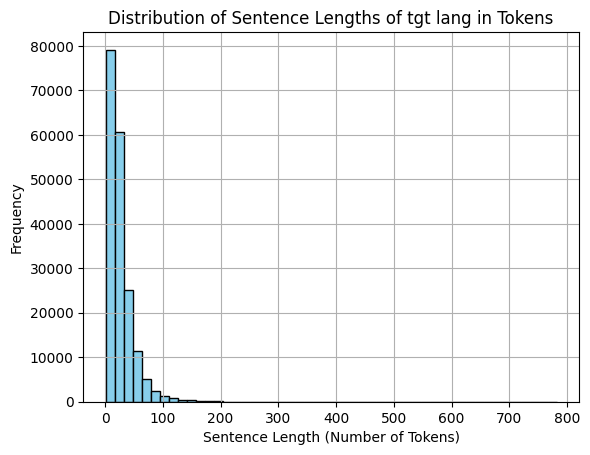

In [28]:
# Step 5: Plot the sentence length distribution of tgt lang
plt.hist(es_sentence_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Lengths of tgt lang in Tokens')
plt.xlabel('Sentence Length (Number of Tokens)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
import torchmetrics